<a href="https://colab.research.google.com/github/AbhinavGor/TensorFlow-Lessons/blob/main/Lesson_3_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST dataset contains 70,000 images of clothing items. It has 10 types of items.
<table>
  <tr>
  <th>Label</th>
  <th>Class</th>
  </tr>
  <tr>
  <td>0</td>
  <td>T-Shirt/Top</td>
  </tr>
  <tr>
  <td>1</td>
  <td>Trouser</td>
  </tr>
  <tr>
  <td>2</td>
  <td>Pullover</td>
  </tr>
  <tr>
  <td>3</td>
  <td>Dress</td>
  </tr>
  <tr>
  <td>4</td>
  <td>Coat</td>
  </tr>
  <tr>
  <td>5</td>
  <td>Sandal</td>
  </tr>
  <tr>
  <td>6</td>
  <td>Shirt</td>
  </tr>
  <tr>
  <td>7</td>
  <td>Sneaker</td>
  </tr>
  <tr>
  <td>8</td>
  <td>Bag</td>
  </tr>
  <tr>
  <td>9</td>
  <td>Ankle Boot</td>
  </tr>
  </table>

ReLU (Rectified Linear Unit) is a mathematical function which gives an output of 0 for inputs less than or equal to 0. But for inupts greater than 0, the output will be the input itself. ReLU gives a neural network the ability to solve non linear problems. 

ReLU is a type of activation function.

<ol>
<li>Flattening - The process of converting a 2d image into 1d vector</li>
<li>ReLU - An activation function which helps Neural networks in solving non linear probems</li>
<li>Softmax - A function that provides probabilities for each possible output class.</li>
</ol>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 4.0 MB 2.3 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [4]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.6.0


In [5]:
dataset, metadata = tfds.load('fashion_mnist',as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling fashion_mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling fashion_mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
class_names = ['Tshirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of testing examples: 10000


In [9]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

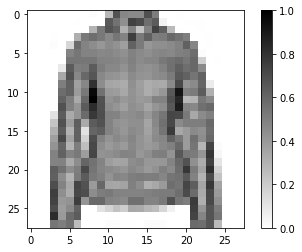

In [10]:
for image, label in test_dataset.take(1):
  break

image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

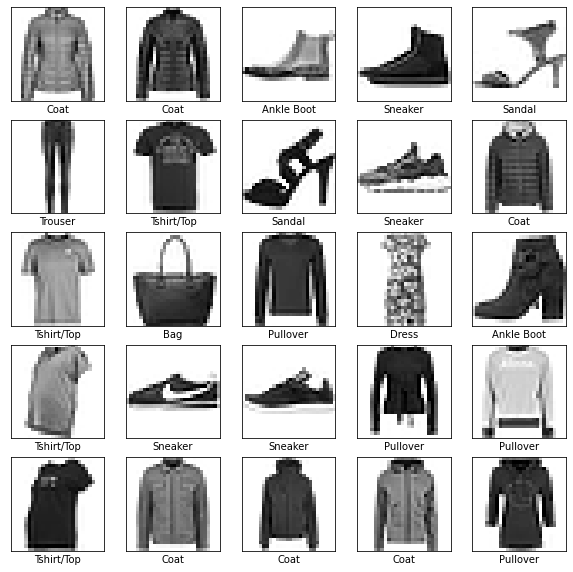

In [13]:
plt.figure(figsize = (10, 10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1

plt.show()

In [16]:
# Builidng the model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
# COmpile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
#Train the model
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [20]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 20s 5ms/step - loss: 0.4972 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3700 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3397 - accuracy: 0.8755
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3110 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2906 - accuracy: 0.8924


In [21]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on test dataset is: {}'.format(test_accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.3534 - accuracy: 0.8750
Accuracy on test dataset is: 0.875


In [22]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [24]:
predictions.shape

(32, 10)

In [25]:
predictions[1]

array([4.9715596e-05, 3.6401662e-08, 7.3836753e-03, 6.7478666e-08,
       9.3783867e-01, 9.5887494e-08, 5.4724414e-02, 3.3013392e-10,
       3.2287417e-06, 2.7061791e-08], dtype=float32)

In [26]:
np.argmax(predictions[1])

4

In [27]:
test_labels[0]

4